 CREATE FOREST DATA FRAME DATAILS

In [3]:

import pandas as pd
# Specify the file path
file_path = "D:/BirdXLS/Bird_Monitoring_Data_FOREST.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [4]:
#Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
forest_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True)

In [5]:
# later u can Drop the 'Sheet' column
forest_df = forest_df.drop(columns=['Sheet'])

In [6]:
forest_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [7]:
forest_df.isnull().sum()

Admin_Unit_Code                   0
Sub_Unit_Code                  7824
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                 

In [8]:
forest_df.drop(columns=['Sub_Unit_Code'],inplace=True) # there are more than 50% of missing value so we can drop it column

In [9]:
# imputing missing data.categorical values in fill with using stats methode of mode
#forest_df['ID_Method'].value_counts()
forest_df.fillna({'ID_Method':'Singing'},inplace=True)

In [10]:
#forest_df['Distance'].value_counts()
forest_df.fillna({'Distance':'<= 50 Meters'},inplace=True)

In [11]:
forest_df.fillna({'Sex':'not available'},inplace=True)

In [12]:

forest_df.fillna({'AcceptedTSN':0},inplace=True)

In [13]:
forest_df.isnull().sum().sum()

np.int64(0)

In [13]:
forest_df.duplicated().sum()

np.int64(0)

In [14]:
forest_df.describe()

,Year,Date,Visit,AcceptedTSN,NPSTaxonCode,Temperature,Humidity
count,8546.0,8546,8546.000000,8546.000000,8546.000000,8546.000000,8546.000000
mean,2018.0,2018-06-12 21:17:23.856775168,1.487245,246312.687690,137088.791013,21.871507,77.757032
min,2018.0,2018-05-07 00:00:00,1.000000,0.000000,76625.000000,11.000000,17.500000
25%,2018.0,2018-05-29 00:00:00,1.000000,178359.000000,85846.000000,19.400000,72.500000
50%,2018.0,2018-06-12 00:00:00,1.000000,179021.000000,88350.000000,21.900000,78.800003
75%,2018.0,2018-07-01 00:00:00,2.000000,179759.000000,94215.000000,24.299999,84.300003
max,2018.0,2018-07-15 00:00:00,2.000000,950106.000000,926917.000000,34.400002,97.900002
std,0.0,NaN,0.499867,181845.050217,154932.276585,3.652511,9.296123


In [15]:
forest_df.sample()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
7930,PRWI,PRWI 6,PRWI-0273,Forest,2018,2018-07-03,10:49:00,10:59:00,Brian Swimelar,2,...,91012,BAWW,False,False,32.0,92.0,Clear or Few Clouds,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [16]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8546 non-null   object        
 1   Site_Name                    8546 non-null   object        
 2   Plot_Name                    8546 non-null   object        
 3   Location_Type                8546 non-null   object        
 4   Year                         8546 non-null   int64         
 5   Date                         8546 non-null   datetime64[ns]
 6   Start_Time                   8546 non-null   object        
 7   End_Time                     8546 non-null   object        
 8   Observer                     8546 non-null   object        
 9   Visit                        8546 non-null   int64         
 10  Interval_Length              8546 non-null   object        
 11  ID_Method                    8546 non-null 

GRASSLAND DATA FRAME DETAILS

In [17]:
# Grassland species
filepath="D:\BirdXLS\Bird_Monitoring_Data_GRASSLAND.XLSX"
exceldata=pd.ExcelFile(filepath)
sheetnames=exceldata.sheet_names
sheetsdict = {sheet: exceldata.parse(sheet) for sheet in sheetnames}

In [18]:
grassland_df=pd.concat(
    [df.assign(sheet=sheetname) for sheetname, df in sheetsdict.items()],
    ignore_index=True)

C:\Users\B.Preethi\AppData\Local\Temp\ipykernel_53852\4044312093.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  grassland_df=pd.concat(


In [19]:
# later u can Drop the 'Sheet' column
grassland_df= grassland_df.drop(columns=['sheet'])

In [20]:
grassland_df.head()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [21]:
grassland_df.shape

(8531, 29)

In [22]:
grassland_df.isnull().sum()

Admin_Unit_Code                   0
Sub_Unit_Code                  8531
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                       1394
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                      24
TaxonCode                         2
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Previously_Obs              

In [23]:
grassland_df.drop(columns=['Sub_Unit_Code'],inplace=True)

In [24]:
#grassland_df['ID_Method'].value_counts() fill with mode value
grassland_df.fillna({'ID_Method':'Singing'},inplace=True)

In [25]:
#grassland_df['Distance'].value_counts() fill with mode 
grassland_df.fillna({'Distance':'50 - 100 Meters'},inplace=True)

In [26]:
#grassland_df['AcceptedTSN'].value_counts()
grassland_df.fillna({'AcceptedTSN':0},inplace=True)

In [27]:
grassland_df.fillna({'TaxonCode':0},inplace=True)

In [28]:
grassland_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8526     True
8527     True
8528     True
8529     True
8530     True
Length: 8531, dtype: bool

In [29]:
grassland_df.tail(10)

,Admin_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,Interval_Length,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
8521,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,BLJA,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,True
8522,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,BLJA,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,True
8523,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8524,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,COGR,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8525,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8526,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8527,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8528,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8529,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8530,MONO,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,2.5 - 5 min,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False


In [30]:
grassland_df_copy = grassland_df.drop_duplicates()

In [31]:
grassland_df_copy.shape

(6826, 28)

In [32]:
grassland_df_copy.describe() # it will gives the numerical cols in statistical measures

,Date,AcceptedTSN,TaxonCode,Temperature,Humidity
count,6826,6826.000000,6826.000000,6826.000000,6826.000000
mean,2018-06-14 19:22:22.748315392,201929.907999,105675.466012,23.272956,69.655098
min,2018-05-07 00:00:00,0.000000,0.000000,11.000000,7.300000
25%,2018-05-23 00:00:00,178627.000000,84865.000000,20.200001,62.200001
50%,2018-06-19 00:00:00,179150.000000,88296.000000,22.799999,70.099998
75%,2018-07-11 00:00:00,179443.000000,94215.000000,26.400000,80.300003
max,2018-07-19 00:00:00,950061.000000,926917.000000,37.299999,98.800003
std,NaN,105070.822849,90329.250642,4.669413,13.740033


In [33]:
grassland_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 8521
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              6826 non-null   object        
 1   Plot_Name                    6826 non-null   object        
 2   Location_Type                6826 non-null   object        
 3   Year                         6826 non-null   object        
 4   Date                         6826 non-null   datetime64[ns]
 5   Start_Time                   6826 non-null   object        
 6   End_Time                     6826 non-null   object        
 7   Observer                     6826 non-null   object        
 8   Visit                        6826 non-null   object        
 9   Interval_Length              6826 non-null   object        
 10  ID_Method                    6826 non-null   object        
 11  Distance                     6826 non-null   obj

In [34]:
grassland_df_copy.duplicated().sum()

np.int64(0)

merge the forest and grassland data frames


In [35]:
import pandas as pd
merge_df=pd.concat([forest_df,grassland_df_copy],axis=0)
merge_df.shape

(15372, 30)

In [36]:
merge_df.duplicated().sum()

np.int64(0)

In [38]:
merge_df.head()

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,TaxonCode,Previously_Obs
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN


In [39]:
merge_df.isnull().sum()

Admin_Unit_Code                   0
Site_Name                      6826
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         0
Distance                          0
Flyover_Observed                  0
Sex                               0
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       0
NPSTaxonCode                   6826
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                       0
Initial_Three_Min_Cnt       

In [40]:

merge_df.fillna({'Site_Name':'not available'},inplace=True)



In [41]:
merge_df.fillna({'NPSTaxonCode':0},inplace=True)
merge_df.fillna({'TaxonCode':0},inplace=True)

merge_df.fillna({'Sex':'not available'},inplace=True)

merge_df.fillna({'Previously_Obs':'not available'},inplace=True)

In [42]:
merge_df.isnull().sum().sum()

np.int64(0)

In [43]:
merge_df.columns

Index(['Admin_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year',
       'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit',
       'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex',
       'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'TaxonCode', 'Previously_Obs'],
      dtype='object')

In [44]:
merge_df.describe()

,Date,AcceptedTSN,NPSTaxonCode,Temperature,Humidity,TaxonCode
count,15372,15372.000000,15372.000000,15372.000000,15372.000000,15372.000000
mean,2018-06-13 17:45:11.943794176,226604.331317,76213.947957,22.493826,74.159335,46925.626529
min,2018-05-07 00:00:00,0.000000,0.000000,11.000000,7.300000,0.000000
25%,2018-05-24 00:00:00,178581.000000,0.000000,19.700001,68.000000,0.000000
50%,2018-06-14 00:00:00,179124.000000,84865.000000,22.200001,76.599998,0.000000
75%,2018-07-03 00:00:00,179637.000000,89102.000000,25.000000,83.400002,87184.000000
max,2018-07-19 00:00:00,950106.000000,926917.000000,37.299999,98.800003,926917.000000
std,NaN,154178.730309,134104.627221,4.193138,12.168509,79874.656394


In [45]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15372 entries, 0 to 8521
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              15372 non-null  object        
 1   Site_Name                    15372 non-null  object        
 2   Plot_Name                    15372 non-null  object        
 3   Location_Type                15372 non-null  object        
 4   Year                         15372 non-null  object        
 5   Date                         15372 non-null  datetime64[ns]
 6   Start_Time                   15372 non-null  object        
 7   End_Time                     15372 non-null  object        
 8   Observer                     15372 non-null  object        
 9   Visit                        15372 non-null  object        
 10  Interval_Length              15372 non-null  object        
 11  ID_Method                    15372 non-null  ob

In [48]:
# sql connection 
import pandas as pd
from sqlalchemy import create_engine

# Replace with your connection details
host = "localhost"
port = "5432"  
database = "MDTm37"
username = "postgres"
password = "post38"

# Create the connection string (URL format) -> postgres
engine_string = f"postgresql://{username}:{password}@{host}:{port}/{database}"


# Create the SQLAlchemy engine
engine = create_engine(engine_string)


# Table name where you want to push the data
table_name = "Bird_Species"

# Push the DataFrame to the PostgreSQL table
merge_df.to_sql(table_name, engine,if_exists='replace', index=False)  #['fail', 'replace', 'append']

print("Data successfully pushed to PostgreSQL table!")

Data successfully pushed to PostgreSQL table!


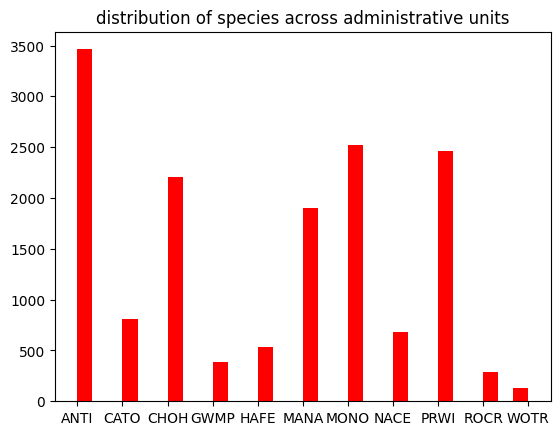

In [49]:
# Analyze the distribution of species across administrative units and habitat types.
import matplotlib.pyplot as plt
plt.hist(merge_df['Admin_Unit_Code'],bins=30,color='red')
plt.title('distribution of species across administrative units')
plt.show()

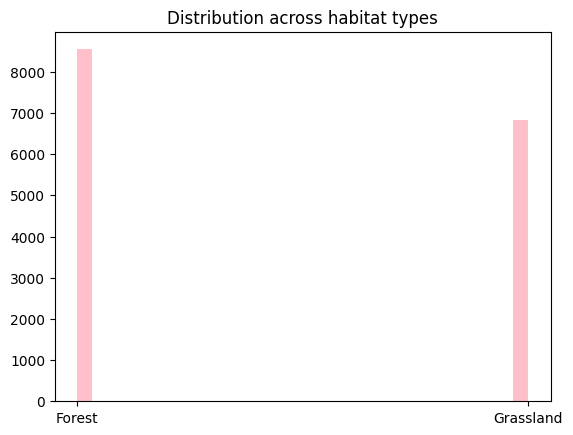

In [50]:
plt.hist(merge_df['Location_Type'],bins=30,color='pink')
plt.title('Distribution across habitat types')
plt.show()

In [51]:
# Study observation frequency by year, month, and season
merge_df['year'] =merge_df['Date'].dt.year
merge_df['month'] = merge_df['Date'].dt.month

In [52]:
# Extract the month name from the date column
merge_df['month'] = merge_df['Date'].dt.month_name()

In [53]:
#define functions to get seasons
def get_seasons(month):
    if month in ['December','January','February']:
        return 'winter'
    elif month in ['March','April','May']:
        return 'spring'
    elif month in ['June','July','August']:
        return 'summer'
    else:
        return 'Atumn'
    
merge_df['seasons'] = merge_df['month'].apply(get_seasons)

In [54]:
merge_df['seasons'] 

0       spring
1       spring
2       spring
3       spring
4       spring
         ...  
8514    spring
8515    spring
8516    spring
8517    spring
8521    spring
Name: seasons, Length: 15372, dtype: object

In [55]:
# frequency by year
yearly_observation_count = merge_df['year'].value_counts()
yearly_observation_count

year
2018    15372
Name: count, dtype: int64

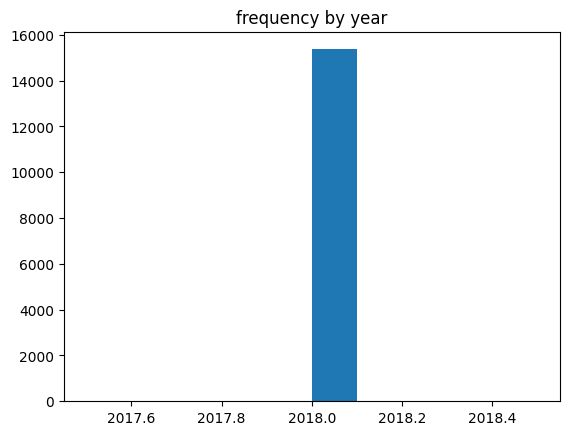

In [56]:
plt.hist(merge_df['year'])
plt.title('frequency by year')
plt.show()

In [57]:
monthly_counts = merge_df['month'].value_counts().sort_index()
monthly_counts

month
July    4297
June    6211
May     4864
Name: count, dtype: int64

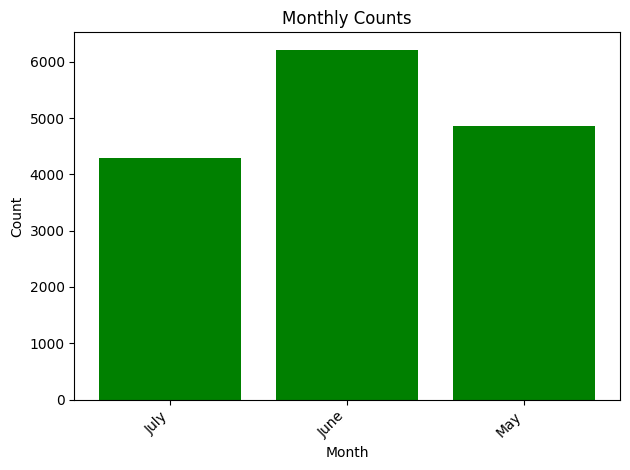

In [58]:
plt.Figure(figsize=(12,8))
plt.bar(monthly_counts.index, monthly_counts.values,color='green')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout() #prevents labels from being cut off.
plt.show()

In [59]:
season_count =merge_df['seasons'].value_counts().sort_index()

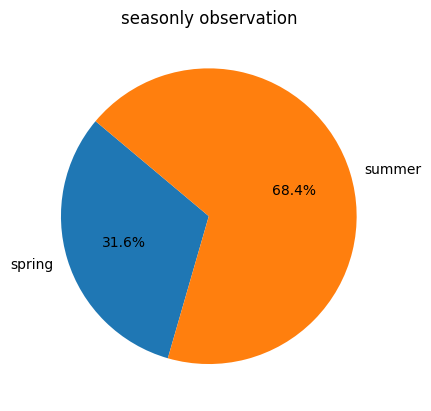

In [60]:
# seasonly observation
plt.Figure(figsize=(8,8))
plt.pie(season_count, labels=season_count.index, autopct='%1.1f%%', startangle=140)
plt.title('seasonly observation')
plt.show()

In [61]:
merge_df['Start_Time'] = pd.to_datetime(merge_df['Start_Time'], format='%H:%M:%S', errors='coerce')

In [62]:
print(merge_df['Start_Time'].dtype)

datetime64[ns]


In [63]:
merge_df['Start_hour'] = merge_df['Start_Time'].dt.hour

In [64]:
start_hour_count = merge_df.groupby(['Start_hour','Initial_Three_Min_Cnt']).size().reset_index(name='count')
start_hour_count

,Start_hour,Initial_Three_Min_Cnt,count
0,5,False,587
1,5,True,701
2,6,False,1757
3,6,True,2080
4,7,False,1831
5,7,True,2183
6,8,False,1531
7,8,True,1665
8,9,False,924
9,9,True,1092


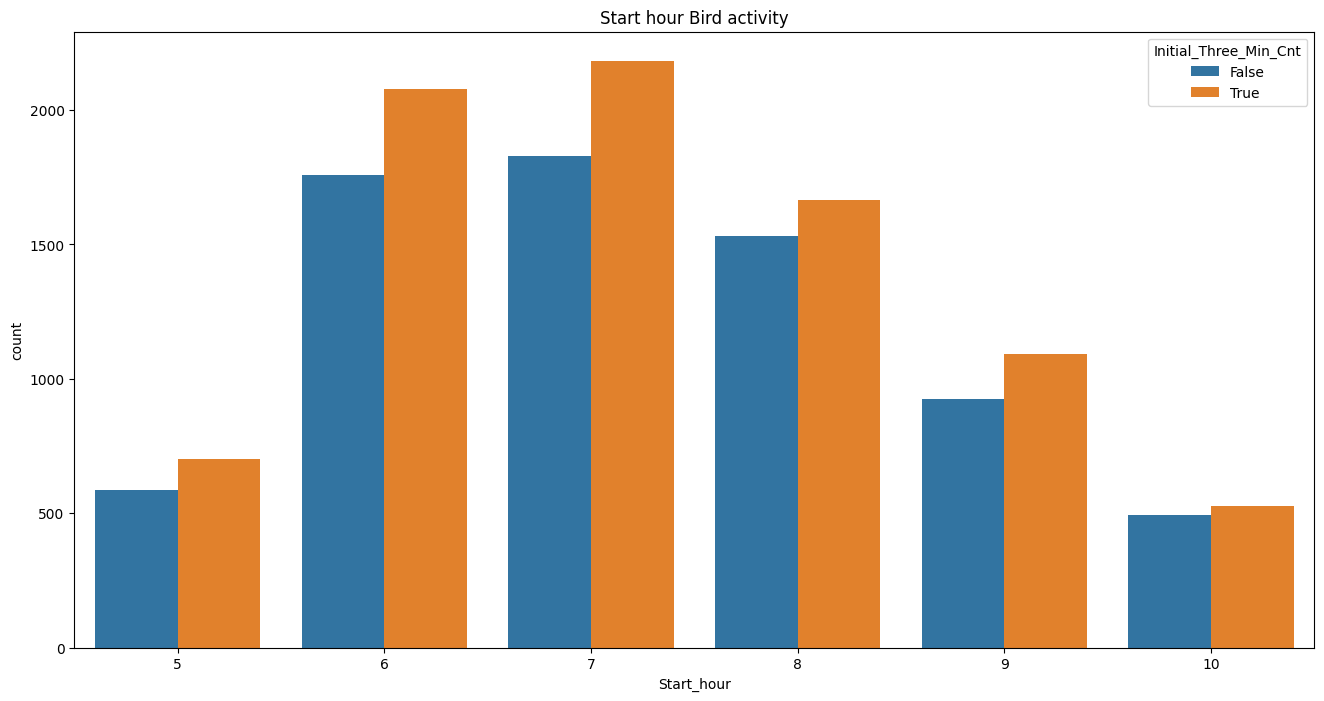

In [65]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.barplot(x='Start_hour',y='count',hue='Initial_Three_Min_Cnt',data=start_hour_count)
plt.title('Start hour Bird activity')
plt.show()

In [66]:
merge_df['End_Time'] = pd.to_datetime(merge_df['End_Time'], format='%H:%M:%S', errors='coerce')
merge_df['End_hour'] = merge_df['End_Time'].dt.hour

In [67]:
End_hour_count = merge_df.groupby(['End_hour','Initial_Three_Min_Cnt']).size().reset_index(name='count')
End_hour_count

,End_hour,Initial_Three_Min_Cnt,count
0,5,False,309
1,5,True,382
2,6,False,1723
3,6,True,2012
4,7,False,1845
5,7,True,2223
6,8,False,1562
7,8,True,1722
8,9,False,1091
9,9,True,1232


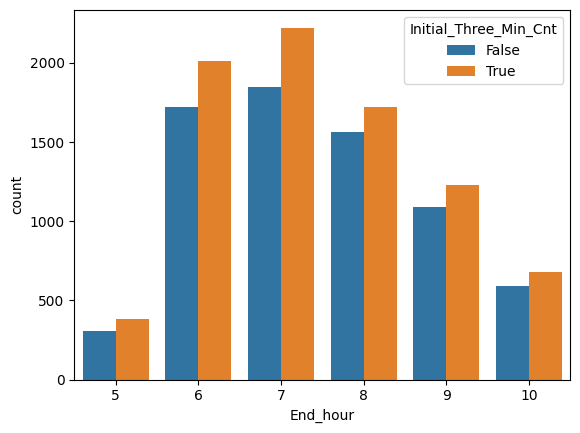

In [68]:
plt.Figure(figsize=(16,8))
sns.barplot(x='End_hour',y='count',hue='Initial_Three_Min_Cnt',data=End_hour_count)
plt.show()

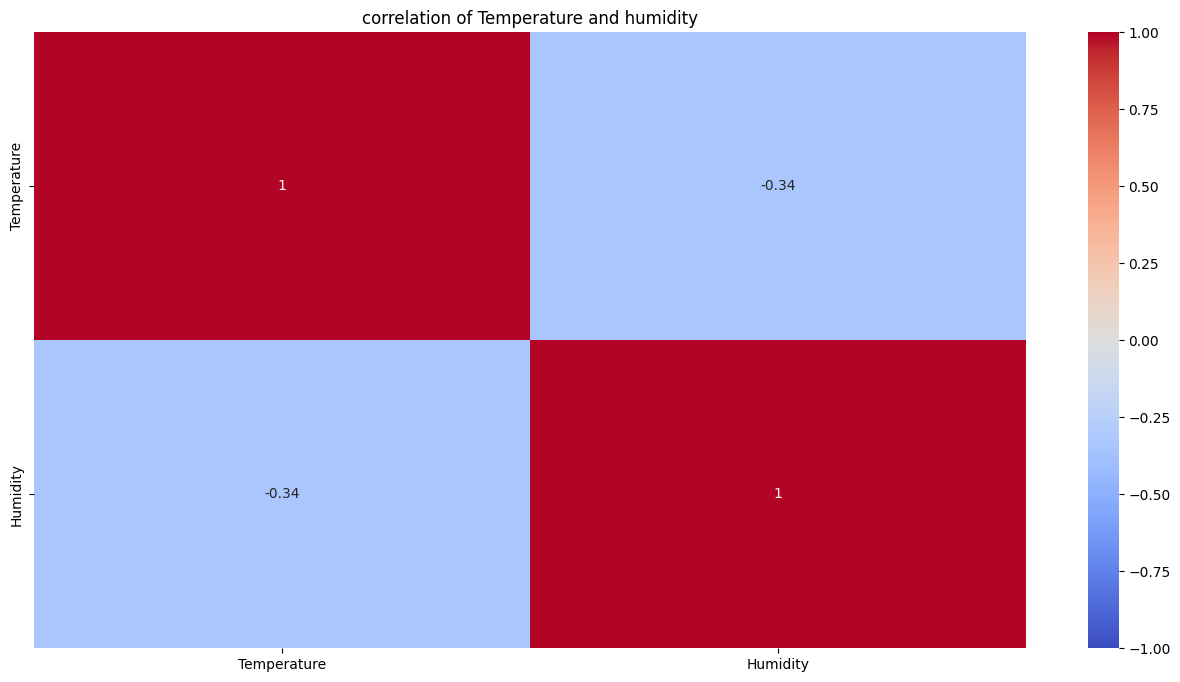

In [69]:
corr_matrix=merge_df [['Temperature','Humidity']].corr()
corr_matrix
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.title('correlation of Temperature and humidity')
plt.show()

In [70]:
grouped_count=merge_df.groupby(['Location_Type','Admin_Unit_Code']).size().reset_index(name='count')
grouped_count

,Location_Type,Admin_Unit_Code,count
0,Forest,ANTI,333
1,Forest,CATO,805
2,Forest,CHOH,2202
3,Forest,GWMP,386
4,Forest,HAFE,422
5,Forest,MANA,465
6,Forest,MONO,370
7,Forest,NACE,684
8,Forest,PRWI,2463
9,Forest,ROCR,289


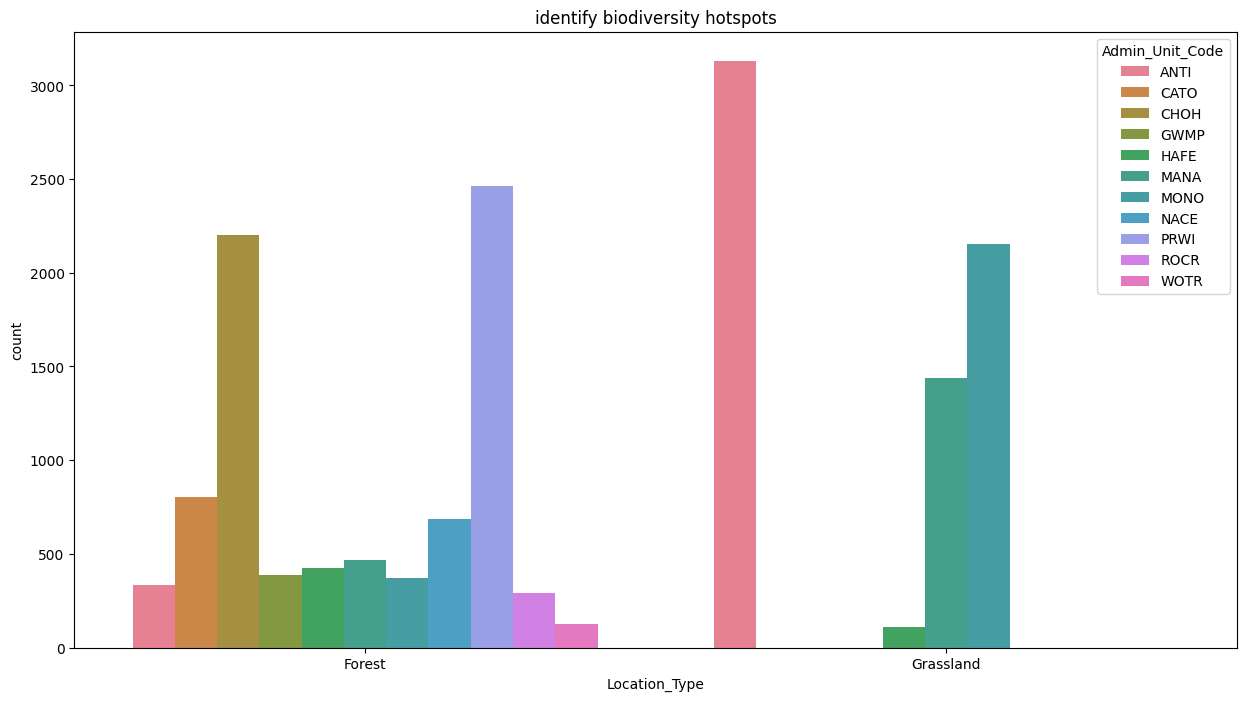

In [71]:
# 2.Spatial Analysis
#Location Insights: Group data by Location_Type (e.g., Grassland) to identify biodiversity hotspots.
import seaborn as sns
plt.figure(figsize=(15,8))
sns.barplot(x='Location_Type',y='count', hue='Admin_Unit_Code', data=grouped_count)
#plt.xticks(rotation=45)
plt.title('identify biodiversity hotspots')
plt.show()


In [72]:
# Plot-Level Analysis: Compare observations across different Plot_Name to see which plots attract 
# more species or specific kinds of birds.
species_per_plot=merge_df.groupby('Plot_Name')['Common_Name'].nunique().reset_index(name='species count')
species_per_plot

,Plot_Name,species count
0,ANTI-0007,23
1,ANTI-0008,20
2,ANTI-0009,25
3,ANTI-0015,22
4,ANTI-0016,24
...,...,...
604,WOTR-0003,12
605,WOTR-0004,16
606,WOTR-0007,10
607,WOTR-0008,10


In [73]:
import plotly.express as px
fig=px.scatter(species_per_plot, x='Plot_Name', y='species count', title='Species Per Plot')
fig.show()


In [74]:
#3. Species Analysis

# size() function returns the count of records (rows) for each group formed by the groupby()
species_count= merge_df.groupby(['Location_Type','Scientific_Name']).size().reset_index(name='count')


In [75]:
species_count

,Location_Type,Scientific_Name,count
0,Forest,Agelaius phoeniceus,50
1,Forest,Aix sponsa,3
2,Forest,Ammodramus savannarum,5
3,Forest,Anas platyrhynchos,4
4,Forest,Archilochus colubris,1
...,...,...,...
210,Grassland,Vireo gilvus,33
211,Grassland,Vireo griseus,1
212,Grassland,Vireo olivaceus,44
213,Grassland,Zenaida macroura,197


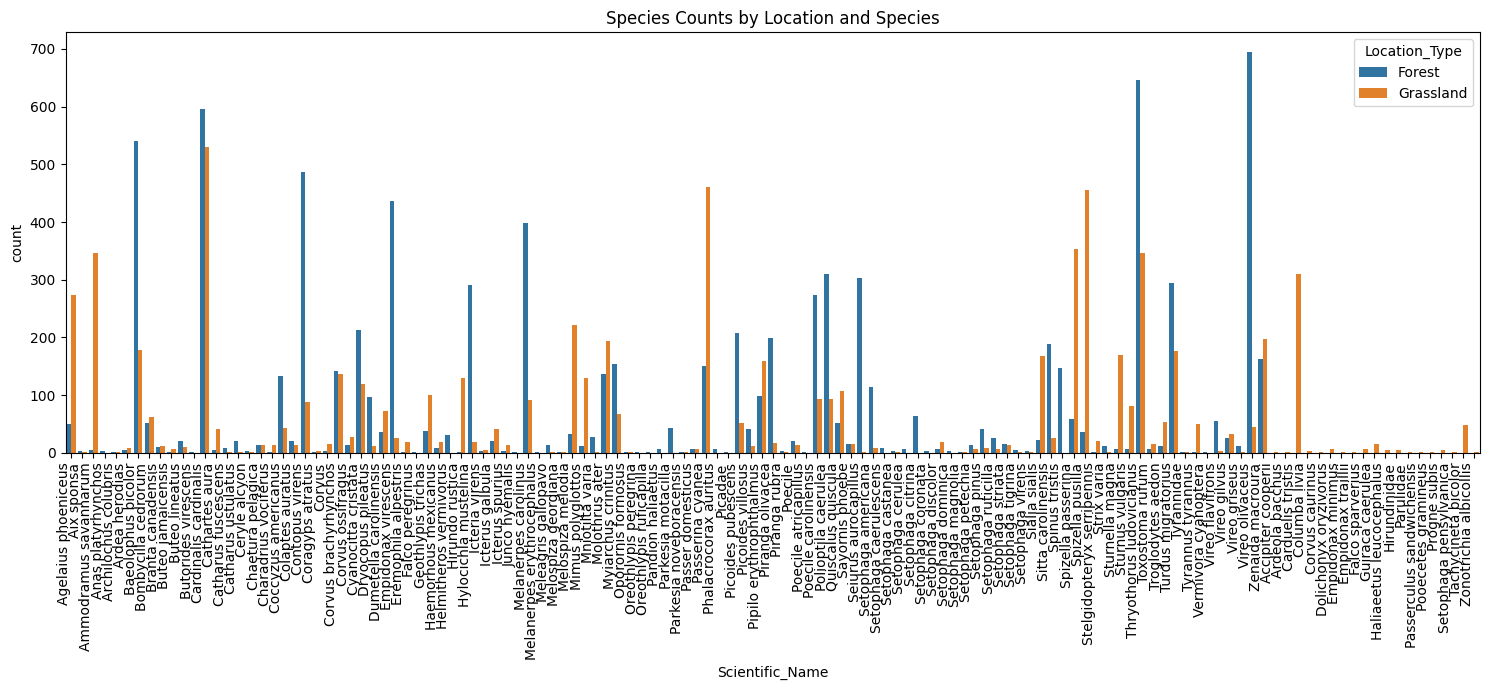

In [76]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Scientific_Name', y='count', hue='Location_Type', data=species_count)
plt.title('Species Counts by Location and Species')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [77]:
activity_count=merge_df['ID_Method'].value_counts()
activity_count

ID_Method
Singing          9623
Calling          3941
Visualization    1808
Name: count, dtype: int64

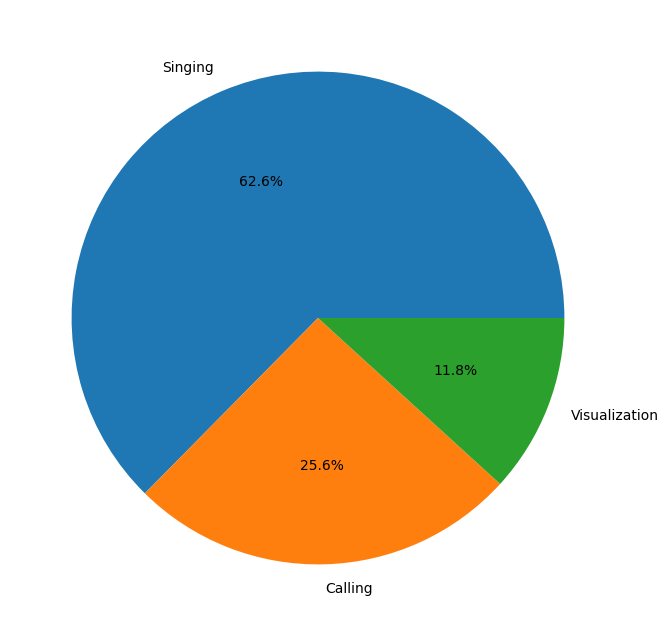

In [78]:
plt.figure(figsize=(8,8))
plt.pie(activity_count,labels=activity_count.index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Interval_Length', ylabel='count'>

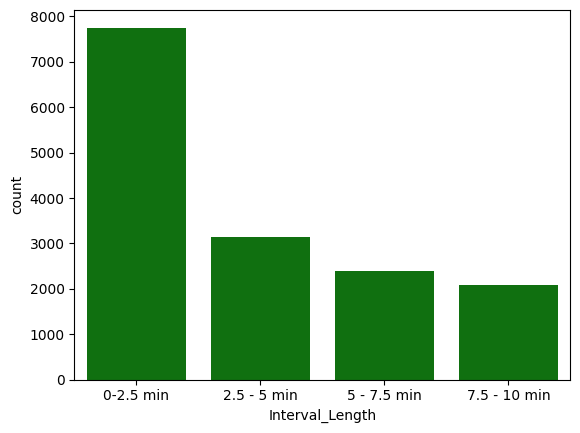

In [79]:
# Activity Patterns: Check the Interval_Length and ID_Method columns to identify the most common activity types (e.g., Singing).
sns.countplot(x='Interval_Length',data = merge_df,color='green')

<Axes: xlabel='Sex', ylabel='count'>

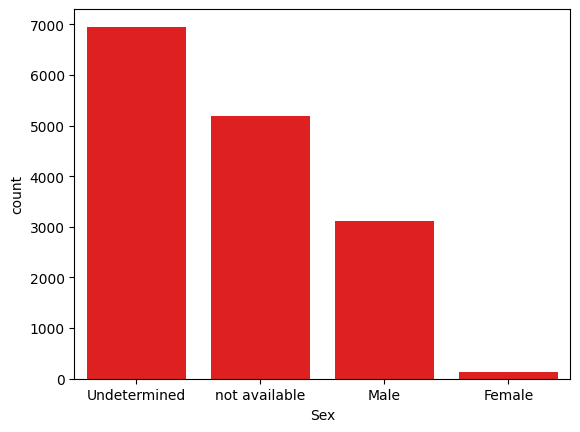

In [80]:

sns.countplot(x='Sex',data=merge_df,color='red')


correlation matrix:
              Temperature  Humidity
Temperature     1.000000 -0.337616
Humidity       -0.337616  1.000000

summary statistics:
         Temperature      Humidity
count  15372.000000  15372.000000
mean      22.493826     74.159335
std        4.193138     12.168509
min       11.000000      7.300000
25%       19.700001     68.000000
50%       22.200001     76.599998
75%       25.000000     83.400002
max       37.299999     98.800003


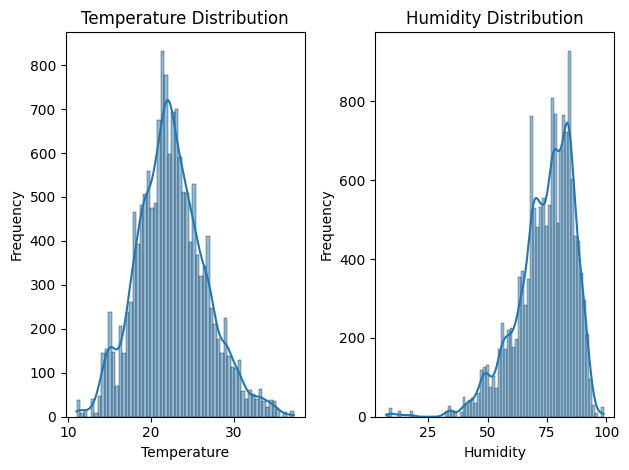

In [81]:
# Environmental Conditions
corr_matrix=merge_df[['Temperature','Humidity']].corr()
print("\ncorrelation matrix:\n",corr_matrix)
summary_stats = merge_df[['Temperature','Humidity']].describe()
print("\nsummary statistics:\n",summary_stats )
# Temperature Histogram
plt.subplot(1, 2, 1)
sns.histplot(merge_df['Temperature'], kde=True)  # kde adds a kernel density estimate
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Humidity Histogram
plt.subplot(1, 2, 2)
sns.histplot(merge_df['Humidity'], kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Calm (< 1 mph) smoke rises vertically'),
  Text(1, 0, 'Light air movement (1-3 mph) smoke drifts'),
  Text(2, 0, 'Light breeze (4-7 mph) wind felt on face'),
  Text(3, 0, 'Gentle breeze (8-12 mph), leaves in motion')])

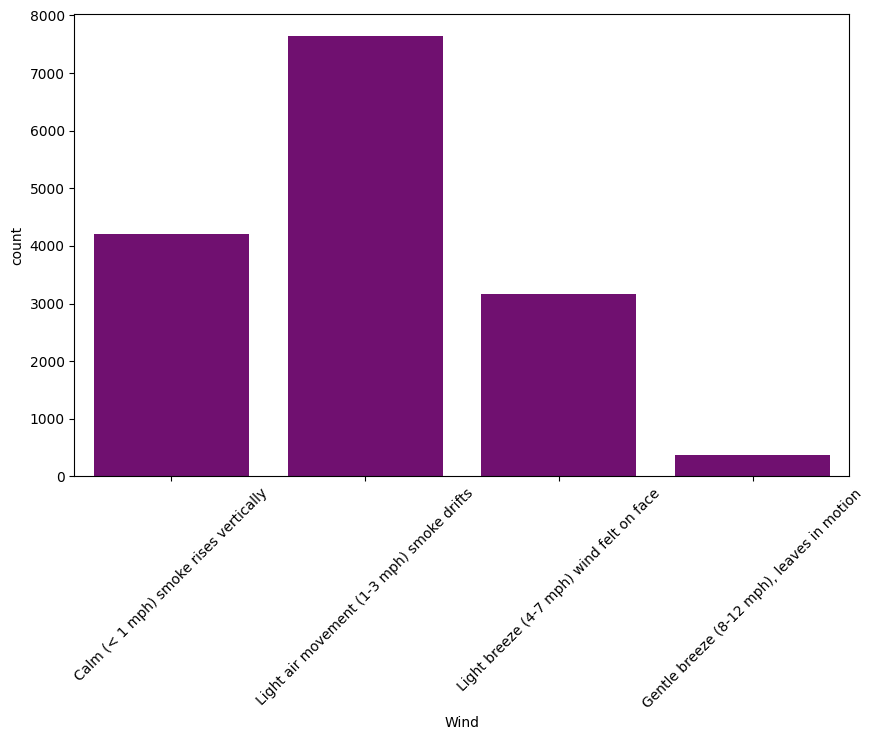

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='Wind',data=merge_df,color='purple')
plt.xticks(rotation=45)

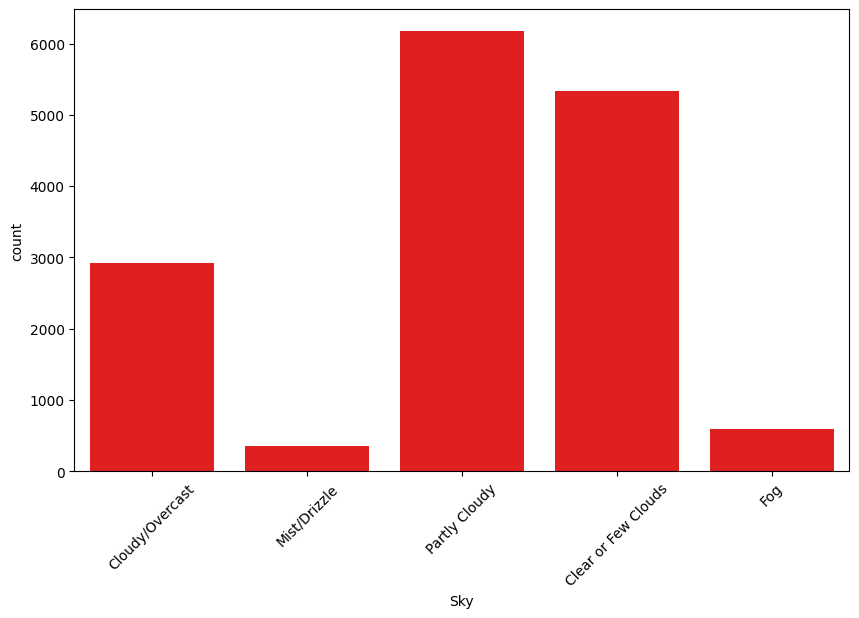

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sky',data=merge_df,color='red')
plt.xticks(rotation=45)
plt.show()

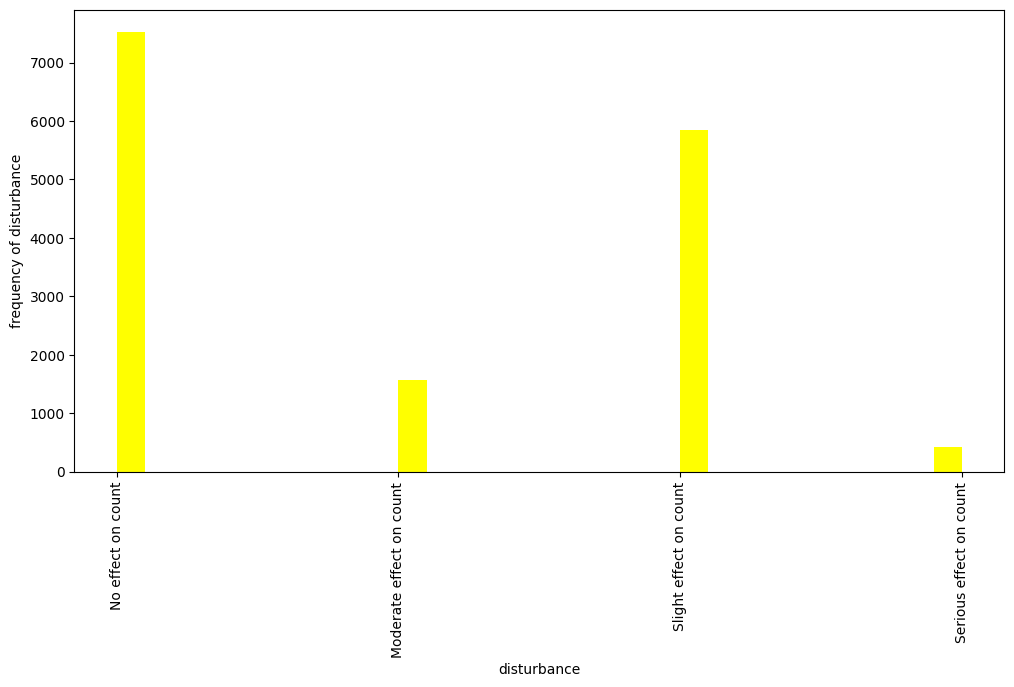

In [84]:
#Disturbance
plt.figure(figsize=(12,6))
plt.hist(merge_df['Disturbance'],bins=30,color='yellow')
plt.xlabel('disturbance')
plt.ylabel('frequency of disturbance')
plt.xticks(rotation=90)
plt.show()

In [85]:
distance_per_species=merge_df.groupby(['Distance','Common_Name']).size().reset_index(name='count')
distance_per_species

,Distance,Common_Name,count
0,50 - 100 Meters,Acadian Flycatcher,176
1,50 - 100 Meters,American Crow,201
2,50 - 100 Meters,American Goldfinch,185
3,50 - 100 Meters,American Kestrel,7
4,50 - 100 Meters,American Redstart,13
...,...,...,...
220,<= 50 Meters,Yellow-billed Cuckoo,72
221,<= 50 Meters,Yellow-breasted Chat,4
222,<= 50 Meters,Yellow-rumped Warbler,3
223,<= 50 Meters,Yellow-throated Vireo,31


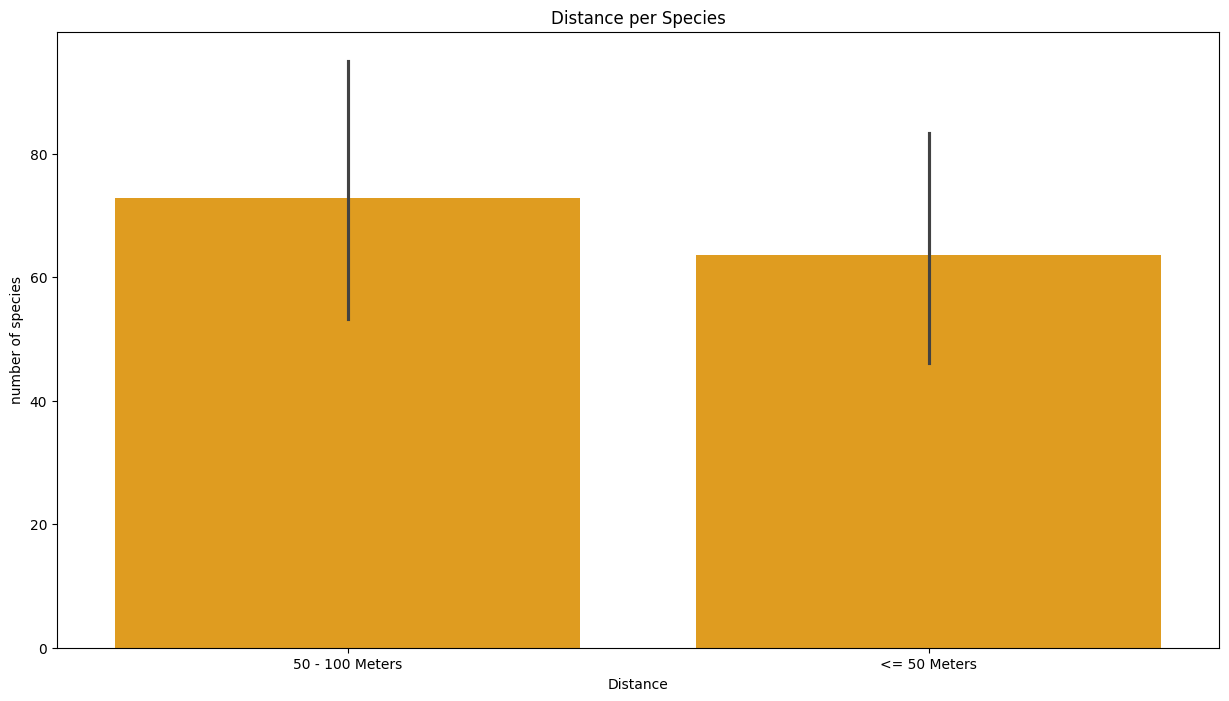

In [92]:
plt.figure(figsize=(15,8))
sns.barplot(x='Distance', y='count',data=distance_per_species,color='orange')
plt.title('Distance per Species')
plt.xlabel('Distance')
plt.ylabel('number of species')
plt.show()

In [93]:
flyover_count = merge_df['Flyover_Observed'].value_counts()

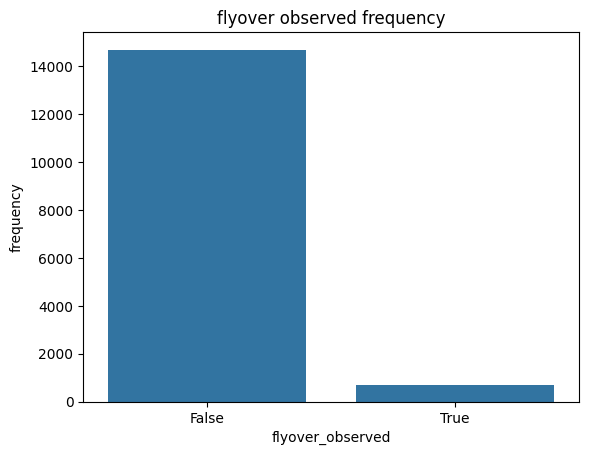

In [94]:
plt.Figure(figsize=(10,6))
sns.barplot(x=flyover_count.index,y=flyover_count.values)
plt.xlabel('flyover_observed')
plt.ylabel('frequency')
plt.title('flyover observed frequency')
plt.show()

In [95]:
# Total Observations per Observer
observer_counts = merge_df['Observer'].value_counts()
observer_counts


Observer
Elizabeth Oswald    5763
Kimberly Serno      5346
Brian Swimelar      4263
Name: count, dtype: int64

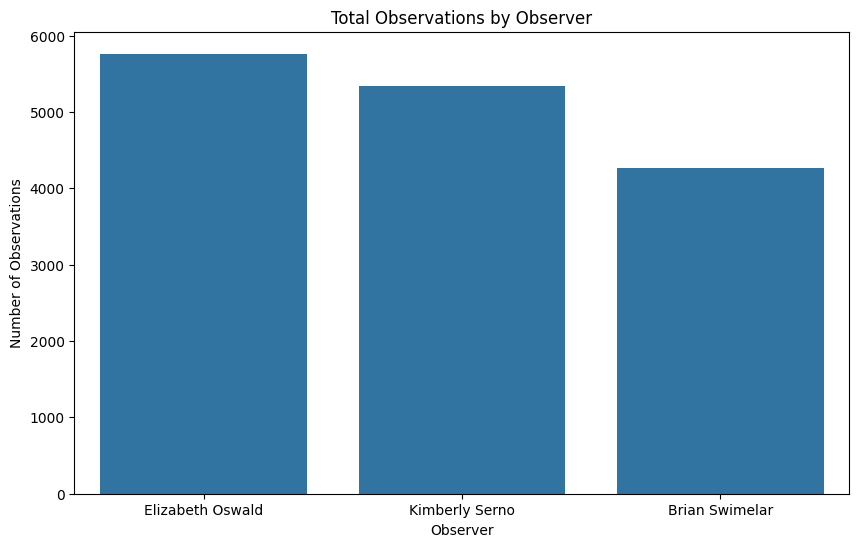

In [96]:

plt.figure(figsize=(10, 6))
sns.barplot(x=observer_counts.index, y=observer_counts.values)
plt.xlabel("Observer")
plt.ylabel("Number of Observations")
plt.title("Total Observations by Observer")
plt.show()

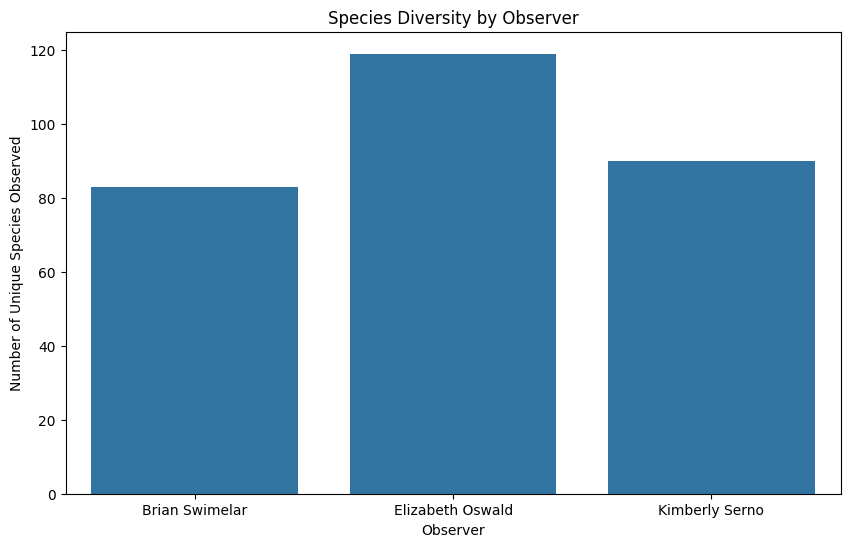

In [97]:
# Species Diversity per Observer
species_diversity = merge_df.groupby('Observer')['Common_Name'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=species_diversity.index, y=species_diversity.values)
plt.xlabel("Observer")
plt.ylabel("Number of Unique Species Observed")
plt.title("Species Diversity by Observer")
plt.show()

<Axes: xlabel='Visit', ylabel='count'>

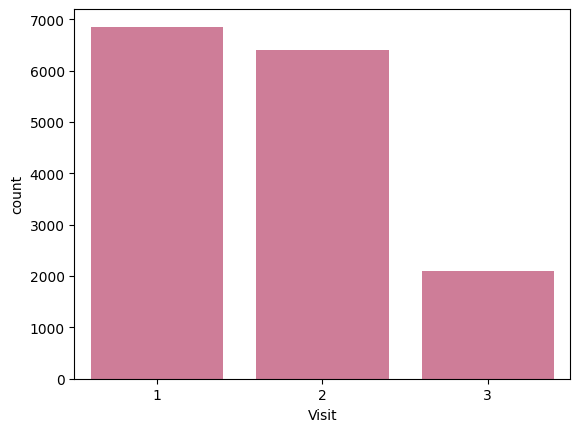

In [98]:
sns.countplot(x='Visit',data=merge_df,color='palevioletred')

In [99]:
conserv=merge_df.groupby('PIF_Watchlist_Status')['Common_Name'].value_counts().reset_index(name='count')# "TRUE" for at-risk species
conserv

,PIF_Watchlist_Status,Common_Name,count
0,False,Northern Cardinal,1125
1,False,Carolina Wren,993
2,False,Red-eyed Vireo,738
3,False,Eastern Tufted Titmouse,720
4,False,Indigo Bunting,611
...,...,...,...
121,True,Cerulean Warbler,7
122,True,Kentucky Warbler,2
123,True,Willow Flycatcher,2
124,True,Blue-winged Warbler,1


In [110]:
# Conservation Insights
import plotly.express as px

px.scatter(conserv,x='Common_Name',y='count',color='PIF_Watchlist_Status')


<Axes: xlabel='Regional_Stewardship_Status', ylabel='count'>

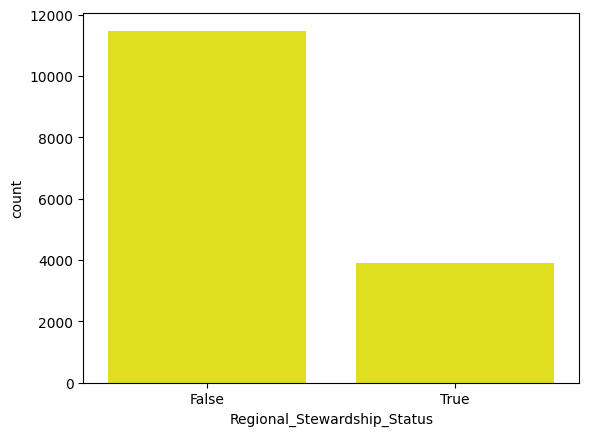

In [111]:
#Denotes the conservation priority within the region (TRUE/FALSE).
sns.countplot(x='Regional_Stewardship_Status',data=merge_df,color='yellow')


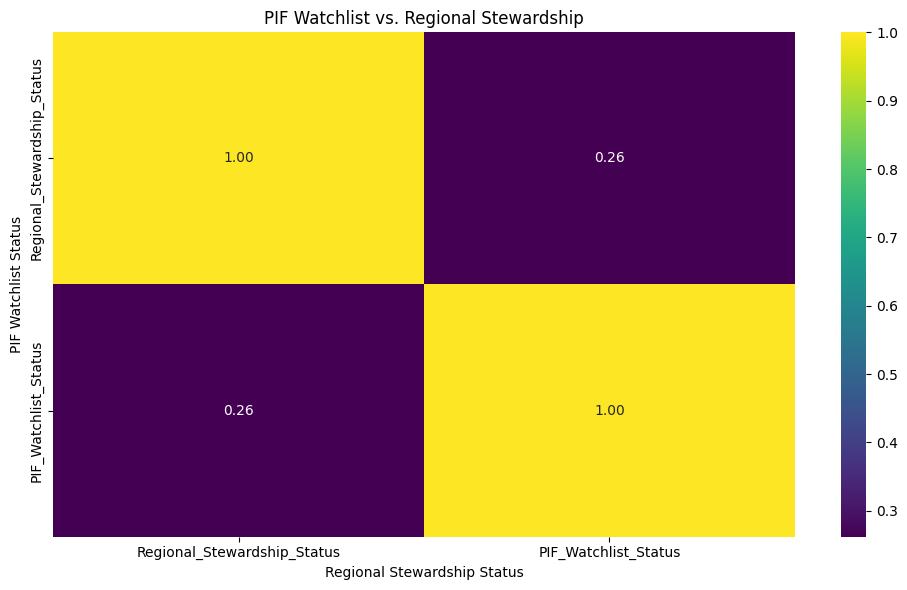

In [112]:
# Create a crosstab
corr_matrix_pif= merge_df[['Regional_Stewardship_Status','PIF_Watchlist_Status']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))  # Create new figure to avoid overlapping
sns.heatmap(corr_matrix_pif,annot=True,fmt='.2f', cmap='viridis') 
plt.title('PIF Watchlist vs. Regional Stewardship')
plt.xlabel('Regional Stewardship Status')
plt.ylabel('PIF Watchlist Status')
plt.tight_layout()
plt.show()